Extracts Data from the Precriber Summary Information and Detailed Data of the Medicare Part D dataset.

In [1]:
import pandas as pd
import requests
import numpy as np

Read CSV files saved from "Converting Data to CSV"

In [2]:
ps_df = pd.read_csv("data\ps_df.csv")

In [3]:
ps_df=ps_df.sample(n = 5000) #since ps_df is very big

In [4]:
specialty_df = pd.read_csv("data\specialty_df.csv")

In [5]:
specialty_region_df = pd.read_csv("data\specialty_region_df.csv")

In [6]:
specialty_city_df = pd.read_csv("data\specialty_city_df.csv")

In [7]:
#ps_df.head()
#specialty_df.head()
#specialty_region_df.head()
#specialty_city_df.head()

DataFrames: ps_df - Dataframe for individual NPI
            specialty_df - Dataframe for grouped Specialties
            specialty_region_df - Dataframe for grouped States
            specialty_city_df - Dataframe for grouped Cities

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Scatterplot of Individual Providers

Brand Drug Cost to Generic Drug Cost

Log Transformed Brand Drug Cost to Generic Drug Cost

Text(0, 0.5, 'Generic Drug Cost')

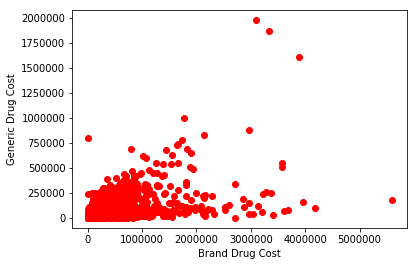

In [9]:
plt.scatter(ps_df["brand_drug_cost"], ps_df["generic_drug_cost"], color = "r")
plt.xlabel("Brand Drug Cost") 
plt.ylabel("Generic Drug Cost")
#plt.xlim(-50,200000)
#plt.ylim(-50,200000)

Text(0, 0.5, 'Log Generic Drug Cost')

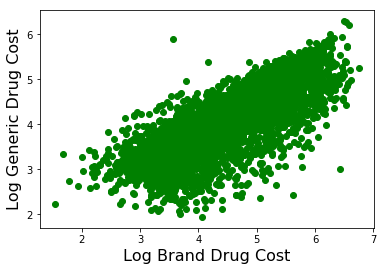

In [10]:
plt.scatter(ps_df["log_brand_cost"], ps_df["log_generic_cost"], color = "g")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of ps_dd_df data
plt.ylabel("Log Generic Drug Cost", fontsize =16)


Scatterplot of Specialties

Brand Drug Cost to Generic Drug Cost

Log Transformed Brand Drug Cost to Generic Drug Cost

Text(0, 0.5, 'Generic Drug Cost')

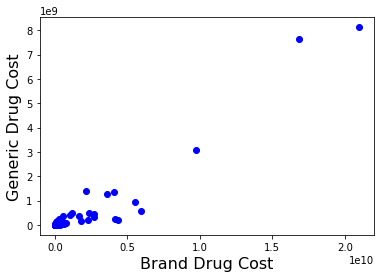

In [11]:
plt.scatter(specialty_df["brand_drug_cost"],specialty_df["generic_drug_cost"], color = "b")
plt.xlabel("Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Generic Drug Cost",  fontsize = 16)

Text(0, 0.5, 'Log Generic Drug Cost')

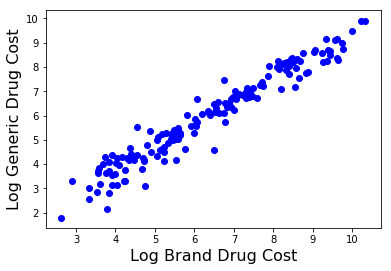

In [12]:
plt.scatter(specialty_df["log_brand_cost"],specialty_df["log_generic_cost"], color = "b")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Log Generic Drug Cost",  fontsize = 16)

In [13]:
specialty_df["brand_percent_spending"].describe()

count    160.000000
mean       0.678850
std        0.181800
min        0.093817
25%        0.569341
50%        0.702101
75%        0.799267
max        0.987356
Name: brand_percent_spending, dtype: float64

Text(0.5, 1.0, 'Brand Spending Ratio by Specialty')

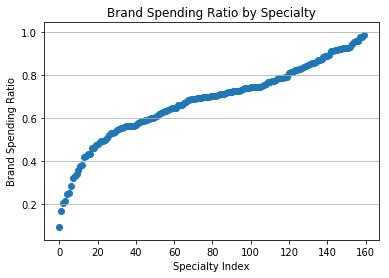

In [14]:
plt.grid(True, "both", "y")
plt.scatter(range(len(specialty_df)),specialty_df["brand_percent_spending"]) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index")
plt.ylabel("Brand Spending Ratio")
plt.title("Brand Spending Ratio by Specialty")

In [15]:
specialty_df["specialty_description"][0:5] #Index for Specialties
#change [0:5] for selection

0    Case Manager/Care Coordinator
1                          Dentist
2      Oral Surgery (Dentist only)
3      Community/Behavioral Health
4     Oral & Maxillofacial Surgery
Name: specialty_description, dtype: object

Grouping Specialties based off of a categorical range of spending

In [16]:
def spending_category(brand_percent_spending): 
    '''Sectioning off Generic Brands ratio cost as low to high'''
    #if brand_percent_spending
    if brand_percent_spending <= .2:
        return "0-.2"
    elif brand_percent_spending <= .4:
        return ".2-.4"
    elif brand_percent_spending <= .6:
        return ".4-.6"
    elif brand_percent_spending <= .8:
        return ".6-.8"
    elif brand_percent_spending > .8:
        return ".8-1"

In [17]:
specialtyCount = specialty_df["brand_percent_spending"].map(spending_category).value_counts(sort = False)

In [18]:
print(specialtyCount.sort_values())

0-.2      2
.2-.4    11
.4-.6    37
.8-1     40
.6-.8    70
Name: brand_percent_spending, dtype: int64


Text(0, 0.5, 'Specialty Count')

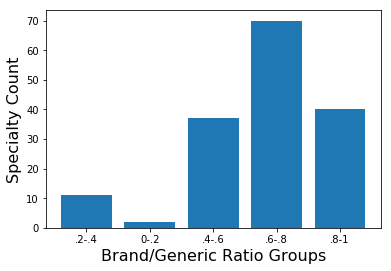

In [19]:
xIndex = specialtyCount.index.values
plt.bar(xIndex, list(specialtyCount))
plt.xlabel("Brand/Generic Ratio Groups", fontsize =16)
plt.ylabel("Specialty Count", fontsize = 16)
#the x labels swap 

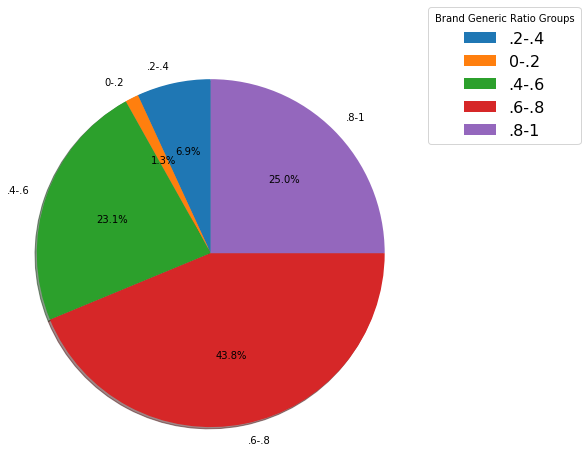

In [20]:
ax = plt.pie(x = list(specialtyCount), labels = xIndex, autopct="%1.1f%%", shadow=True, startangle = 90, radius = 2)
plt.legend(xIndex, title="Brand Generic Ratio Groups", loc = (1.5,1), fontsize =16)

Boxplot of Brand Percent Spending

Text(0.5, 0, 'Brand Spending Ratio')

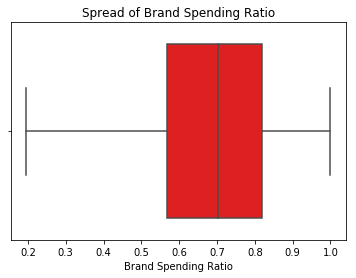

In [21]:
ax = sns.boxplot("brand_percent_spending",color = "red", data=ps_df, showfliers = False)
ax.set_title("Spread of Brand Spending Ratio")
ax.set_xlabel("Brand Spending Ratio")

Multiple Jointplots that represent how the Brand to Generic ratio looks

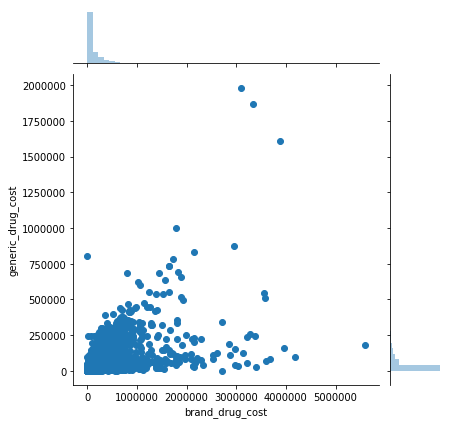

In [22]:
sns.jointplot("brand_drug_cost", "generic_drug_cost", kind = "scatter", data=ps_df)

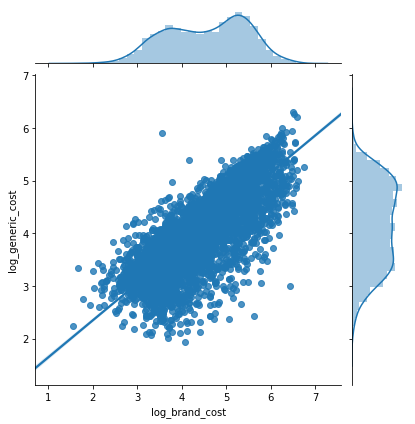

In [23]:
sns.jointplot("log_brand_cost", "log_generic_cost", kind = "reg", data=ps_df)

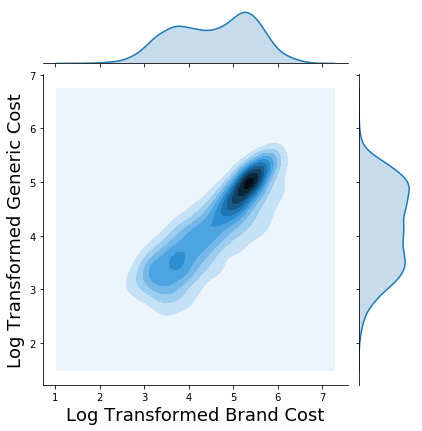

In [24]:
ax = sns.jointplot("log_brand_cost", "log_generic_cost", data=ps_df,kind = "kde" )
ax.set_axis_labels(xlabel = "Log Transformed Brand Cost", ylabel = "Log Transformed Generic Cost", fontsize = 18)


Graphs for Specialties with most counts

In [25]:
top_df = specialty_df.loc[specialty_df["counts"]>150].sort_values("counts", ascending=False) #run a search for specialties with over 150 providers
top_df.head()

,specialty_description,counts,nppes_provider_zip5,total_claim_count,brand_claim_count,generic_claim_count,brand_drug_cost,generic_drug_cost,total_drug_cost,total_30_day_fill_count,total_day_supply,bene_count,brand_percent_spending,log_brand_cost,log_generic_cost,Index
108,Nurse Practitioner,153964,7.309643e+09,151978445,20649117.0,122734588.0,9.760225e+09,3.078990e+09,1.545438e+10,2.175204e+08,5987124193,20562303.0,0.760189,9.989460,9.488408,108
1,Dentist,130646,6.660429e+09,9374994,28921.0,3944695.0,5.713533e+06,2.827779e+07,9.098643e+07,9.614312e+06,88313943,4898803.0,0.168088,6.756905,7.451446,1
88,Internal Medicine,130302,6.037631e+09,418208124,68484105.0,339642085.0,2.099214e+10,8.121396e+09,3.143322e+10,6.914360e+08,19468789472,28611007.0,0.721044,10.322057,9.909631,88
70,Family Practice,110290,5.896811e+09,413250399,63474840.0,341259097.0,1.687669e+10,7.636705e+09,2.584876e+10,6.771561e+08,19047394792,28131597.0,0.688468,10.227287,9.882906,70
105,Physician Assistant,92495,4.394245e+09,69252697,8996999.0,55109186.0,4.062893e+09,1.367691e+09,6.654453e+09,1.011257e+08,2722615029,12802991.0,0.748150,9.608835,9.135988,105


In [26]:
topFour = top_df["specialty_description"].iloc[0:4].tolist()
#print(topFour[0])

In [27]:
#to shorten the long names
titles = []
for string in topFour:
    if len(string) > 25:
        string=string.split()
        temp = ''
        for x in string:
            temp+= x[0]
        string = temp
    titles.append(string)
print(titles)

['Nurse Practitioner', 'Dentist', 'Internal Medicine', 'Family Practice']


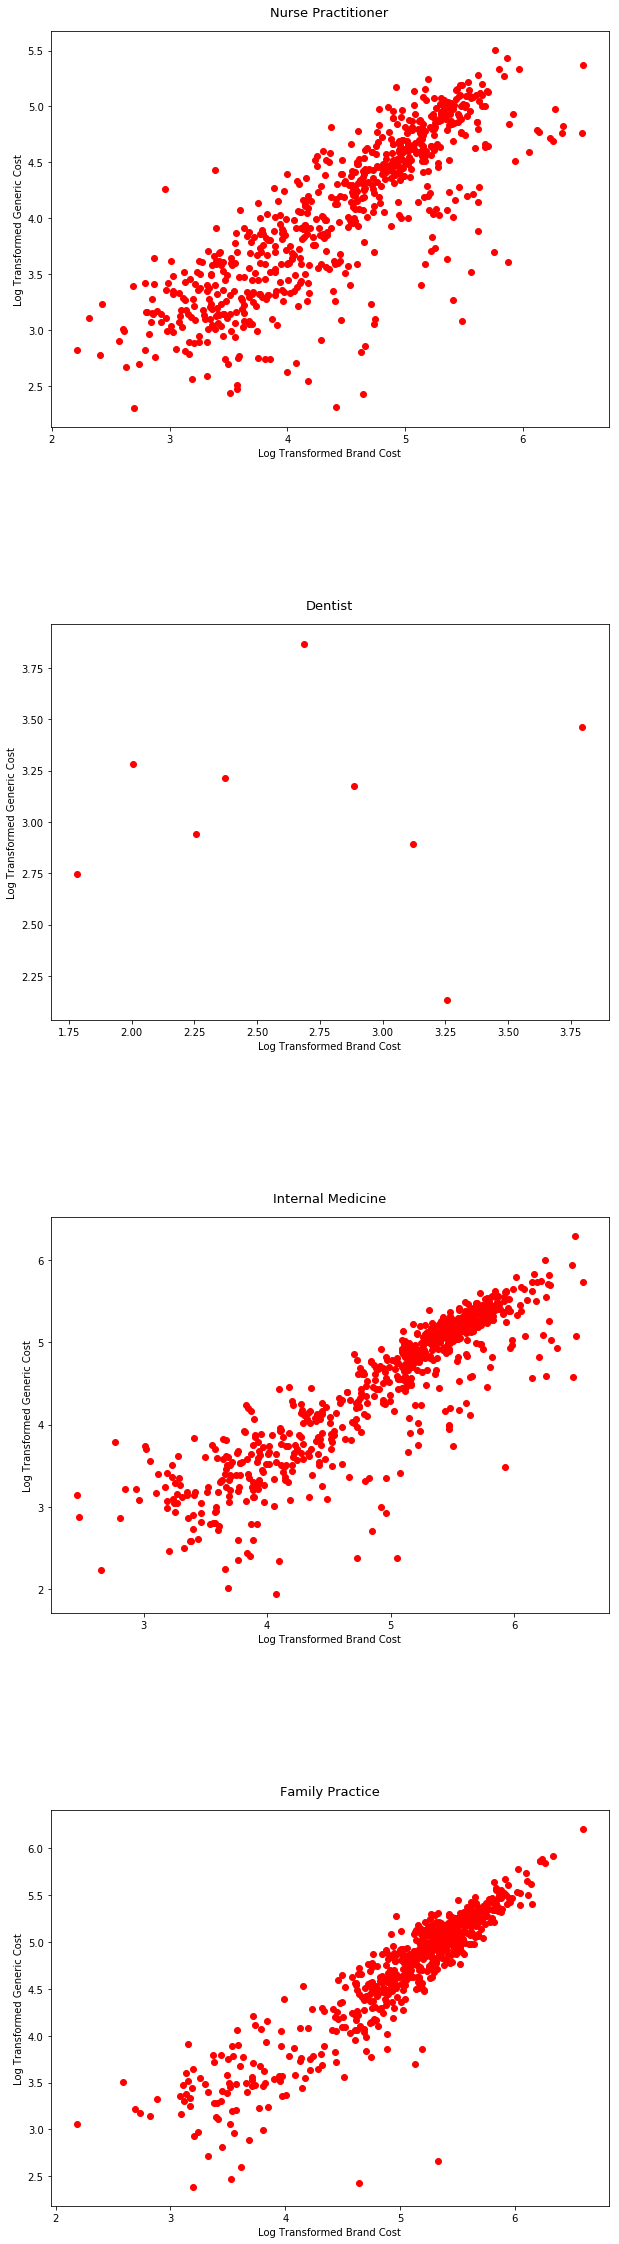

In [28]:

fig , axes = plt.subplots(len(topFour),1, figsize=(10,10 * len(topFour)))
plt.subplots_adjust(wspace = .5, hspace =.5 )

for x in range(len(topFour)):
    axes[x].scatter(ps_df.loc[( ps_df['specialty_description'] == topFour[x] ) , 'log_brand_cost'].tolist() , ps_df.loc[( ps_df['specialty_description'] == topFour[x] ) , 'log_generic_cost'].tolist(),c='r')
    axes[x].set_title(titles[x], fontsize = 13, pad =15)
    axes[x].tick_params(labelsize=10)
    axes[x].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
    axes[x].set_ylabel("Log Transformed Generic Cost", fontsize = 10)
    

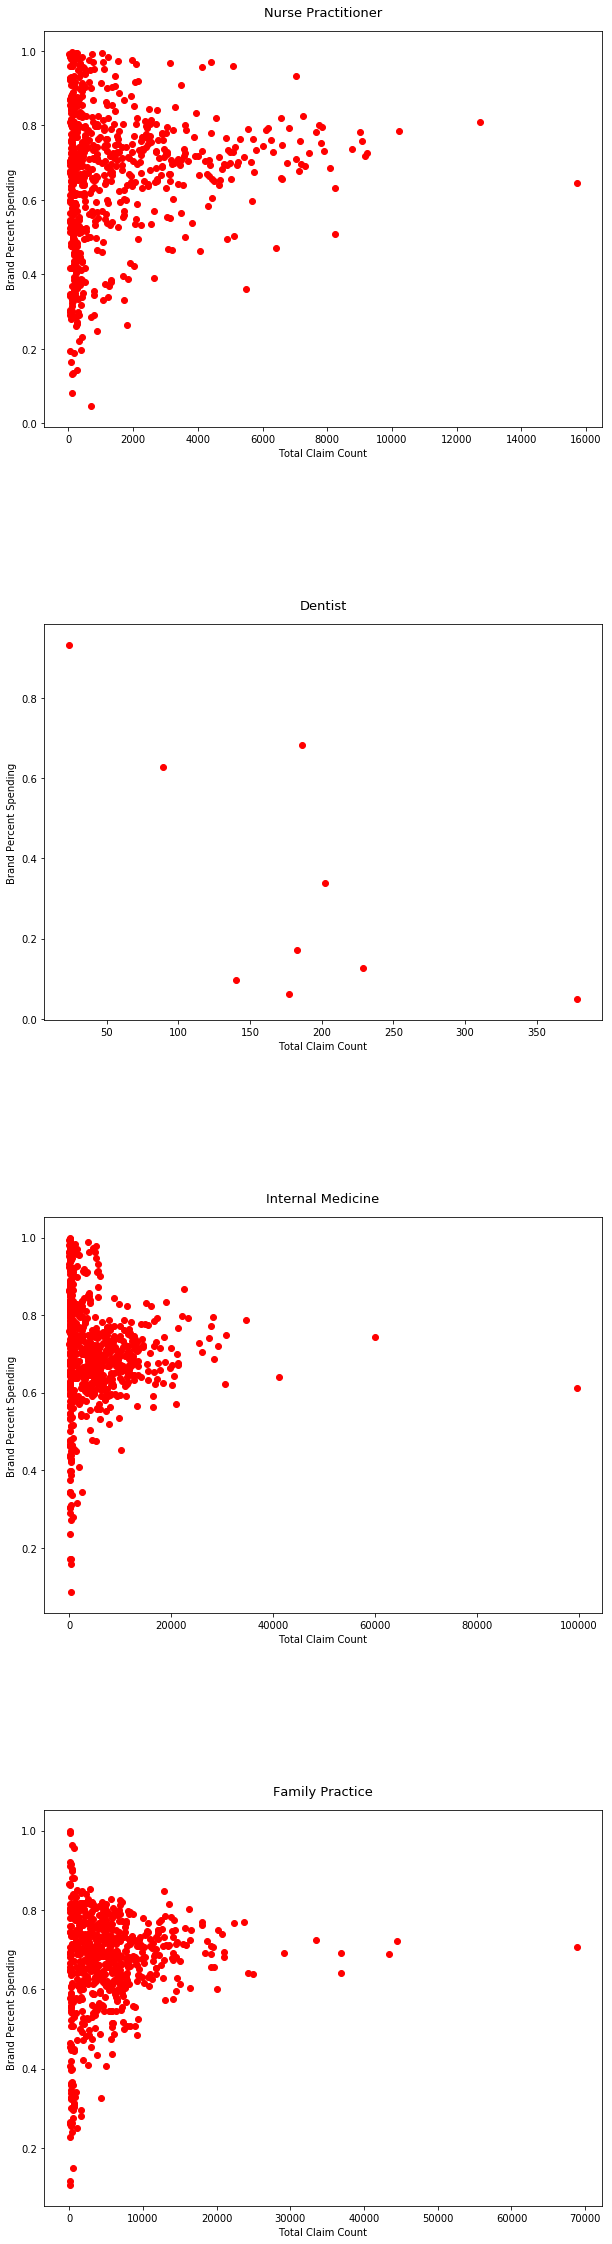

In [29]:

fig , axes = plt.subplots(len(topFour),1, figsize=(10,10 * len(topFour)))
plt.subplots_adjust(wspace = .5, hspace =.5 )

for x in range(len(topFour)):
    axes[x].scatter(ps_df.loc[( ps_df['specialty_description'] == topFour[x] ) , 'total_claim_count'].tolist() , ps_df.loc[( ps_df['specialty_description'] == topFour[x] ) , 'brand_percent_spending'].tolist(),c='r')
    axes[x].set_title(titles[x], fontsize = 13, pad =15)
    axes[x].tick_params(labelsize=10)
    axes[x].set_xlabel("Total Claim Count", fontsize = 10)
    axes[x].set_ylabel("Brand Percent Spending", fontsize = 10)

Scatterplot of State to Brand Percent Spending

Text(0, 0.5, 'Brand Percent Spending')

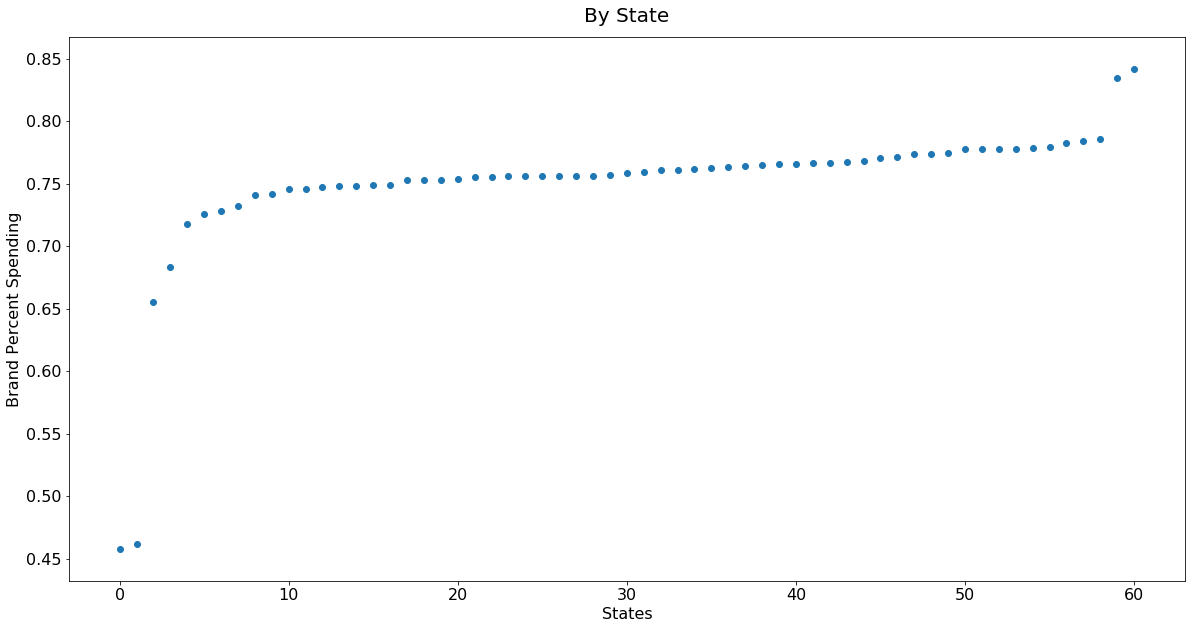

In [30]:
specialty_region_df.sort_values("brand_percent_spending" , inplace = True)

fig , axes = plt.subplots(figsize = (20,10))
plt.subplots_adjust(wspace = .5, hspace =.5 )


axes.scatter(range(len(specialty_region_df)) , specialty_region_df["brand_percent_spending"])

axes.set_title("By State", fontsize = 20, pad =15)
axes.tick_params(labelsize=16)
axes.set_xlabel("States", fontsize = 16)
axes.set_ylabel("Brand Percent Spending", fontsize = 16)

Scatterplot of City to Brand Percent Spending

Scatterplot of City to Brand Percent Spending but Disregarding Cities with counts of 10 or less

Text(0, 0.5, 'Brand Percent Spending')

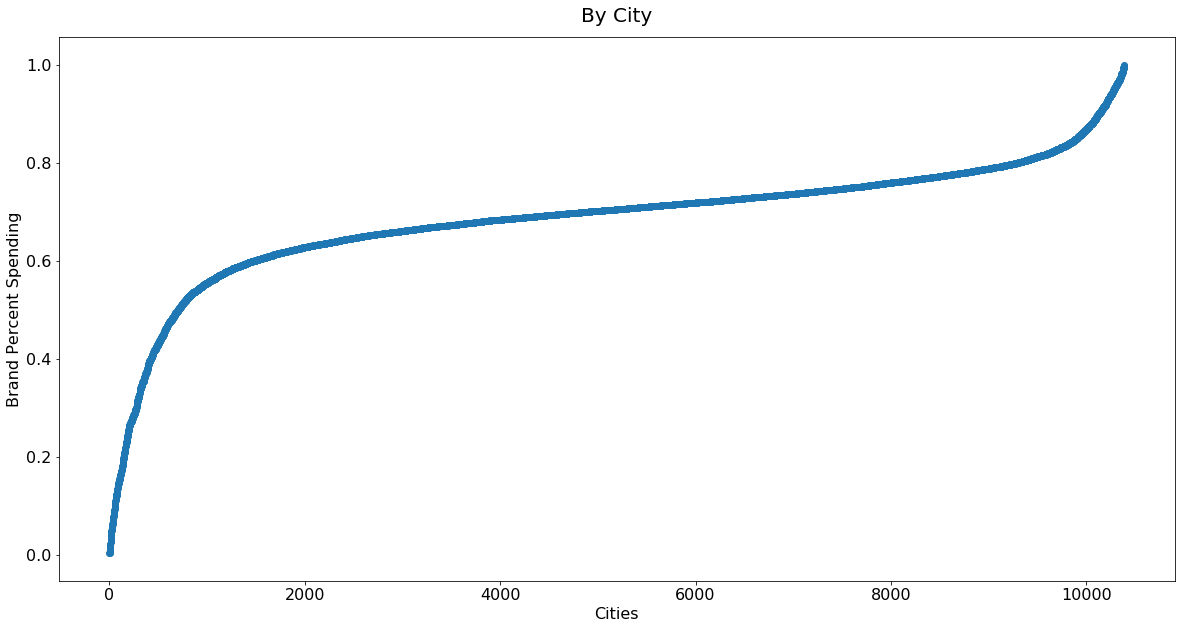

In [31]:
specialty_city_df.sort_values("brand_percent_spending" , inplace = True)
fig , axes = plt.subplots(figsize = (20,10))
plt.subplots_adjust(wspace = .5, hspace =.5 )


axes.scatter(range(len(specialty_city_df)) , specialty_city_df["brand_percent_spending"])

axes.set_title("By City", fontsize = 20, pad =15)
axes.tick_params(labelsize=16)
axes.set_xlabel("Cities", fontsize = 16)
axes.set_ylabel("Brand Percent Spending", fontsize = 16)

In [32]:
specialty_city_top = specialty_city_df[specialty_city_df["counts"] > 10]

C:\Users\John Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Brand Percent Spending')

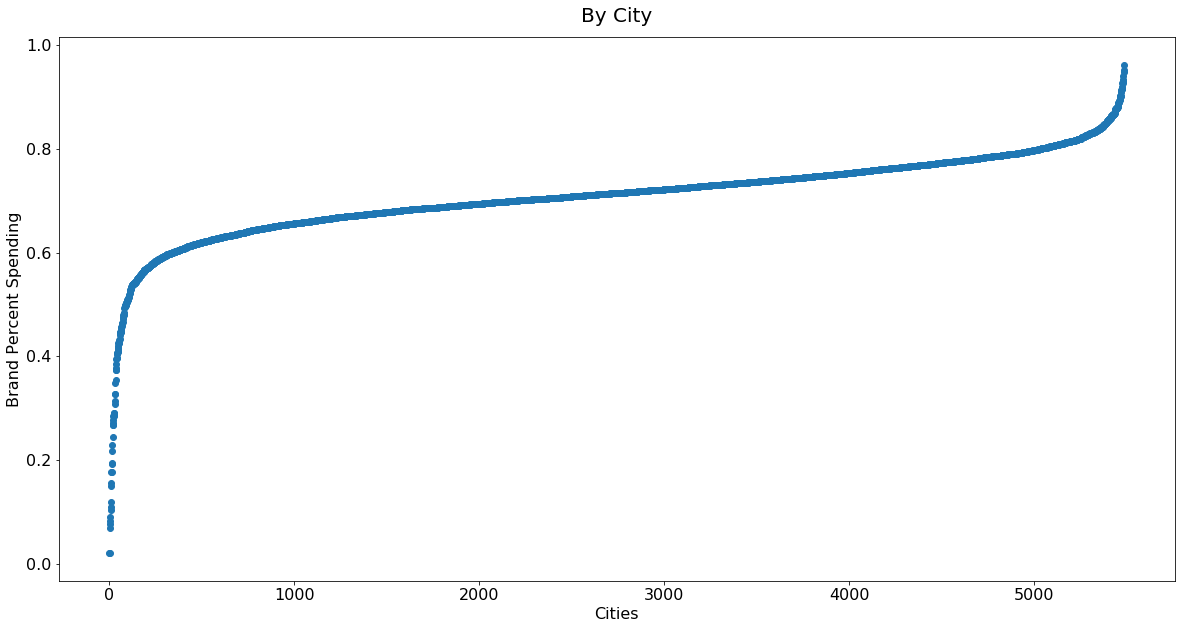

In [33]:
specialty_city_top.sort_values("brand_percent_spending" , inplace = True)
fig , axes = plt.subplots(figsize = (20,10))
plt.subplots_adjust(wspace = .5, hspace =.5 )


axes.scatter(range(len(specialty_city_top)) , specialty_city_top["brand_percent_spending"])

axes.set_title("By City", fontsize = 20, pad =15)
axes.tick_params(labelsize=16)
axes.set_xlabel("Cities", fontsize = 16)
axes.set_ylabel("Brand Percent Spending", fontsize = 16)

medicare enrollment vs Brand Percent Spending

In [34]:
#plt.scatter(ps_df["medicare_prvdr_enroll_status"], ps_df["brand_percent_spending"])

Risk score vs Brand Percent Spending

In [35]:
#plt.scatter(ps_df["beneficiary_average_risk_score"], ps_df["brand_percent_spending"])

Age vs Brand Percent Spending

In [36]:
#plt.scatter(ps_df["average_age_of_beneficiaries"], ps_df["brand_percent_spending"])

Beneficiary Count vs Brand Percent Spending

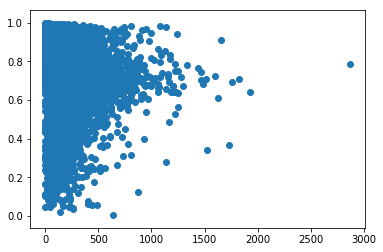

In [37]:
plt.scatter(ps_df["bene_count"], ps_df["brand_percent_spending"])